In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gdf18_23 = pd.read_csv()

In [54]:
dfl=df18.columns.to_list()

In [55]:
alc_cols = [col for col in df18.columns if 'ALC' in col.upper()]
print(alc_cols)

# Columns related to SES, e.g., income, education
ses_cols = [col for col in df18.columns if any(k in col.upper() for k in ['INCOME','EDUC','EMP'])]
print(ses_cols)

mental_health_cols = [col for col in df18.columns if any(k in col.upper() for k in ['MTLHLTH','MTH','MHT','AMI','SMI','SPD'])]
print(mental_health_cols)


['ALCEVER', 'ALCTRY', 'ALCYFU', 'ALCMFU', 'ALCREC', 'ALCYRTOT', 'ALCDAYS', 'ALCUS30D', 'ALCBNG30D', 'IRALCRC', 'IIALCRC', 'II2ALCRC', 'IRALCFY', 'IIALCFY', 'II2ALCFY', 'IRALCFM', 'IIALCFM', 'II2ALCFM', 'IRALCBNG30D', 'IIALCBNG30D', 'IRALCAGE', 'IIALCAGE', 'IRALCYFU', 'IIALCYFU', 'ALCFLAG', 'ALCYR', 'ALCMON', 'ILTOBALCFG', 'ILTOBALCYR', 'ILTOBALCMN', 'ILLALCMON', 'TOBALCFLG', 'TOBALCYR', 'TOBALCMN', 'ILLANDALC', 'ILLORALC', 'ILLALCFLG', 'ALCYDAYS', 'ALCMDAYS', 'ALCNUMDKPM', 'ALCLOTTM', 'ALCGTOVR', 'ALCLIMIT', 'ALCKPLMT', 'ALCNDMOR', 'ALCLSEFX', 'ALCCUTDN', 'ALCCUTEV', 'ALCCUT1X', 'ALCWD2SX', 'ALCWDSMT', 'ALCEMOPB', 'ALCEMCTD', 'ALCPHLPB', 'ALCPHCTD', 'ALCLSACT', 'ALCSERPB', 'ALCPDANG', 'ALCLAWTR', 'ALCFMFPB', 'ALCFMCTD', 'DEPNDALC', 'DPPYILLALC', 'ABUSEALC', 'ABPYILLALC', 'ABODALC', 'DRVINALCO', 'DRVINALCO2', 'ALCAGLST', 'ALCYLU', 'ALCMLU', 'ALCYRBFR', 'NDMORTALC', 'NDTXYRALC', 'TXLTYALCO', 'TXALCONLY', 'TXALCONAG', 'TXALCDRGU', 'TXALCDAGE', 'TXDRGALCU', 'TXYDROALC', 'TXYRALC', 'TXLTYAL

In [82]:
gdf18 = df18.loc[:,['IRPINC3','IRFAMIN3','IRWRKSTAT','POVERTY3','ALCYRTOT','ALDAYPWK','AMHTXRC3','MHRCOST2','SPDMON','SMIPP_U']] #'RCVMHASPTX'
gdf18['YEAR'] = 2018
gdf18.isna().sum()

IRPINC3          0
IRFAMIN3         0
IRWRKSTAT        0
POVERTY3       402
ALCYRTOT         0
ALDAYPWK         0
AMHTXRC3     13585
MHRCOST2     52890
SPDMON       13287
SMIPP_U      13287
YEAR             0
dtype: int64

In [81]:
gdf19 = df19.loc[:, ['IRPINC3','IRFAMIN3','IRWRKSTAT','POVERTY3','ALCYRTOT','ALDAYPWK','AMHTXRC3','MHRCOST2','SPDMON','SMIPP_U']] #'RCVMHASPTX'
gdf19['YEAR'] = 2019
gdf19
gdf19.isna().sum()

IRPINC3          0
IRFAMIN3         0
IRWRKSTAT        0
POVERTY3       527
ALCYRTOT         0
ALDAYPWK         0
AMHTXRC3     13685
MHRCOST2     51957
SPDMON       13397
SMIPP_U      13397
YEAR             0
dtype: int64

In [83]:
gdf20 = df20.loc[:,['IRPINC3','IRFAMIN3','IRWRKSTAT','POVERTY3','ALCYRTOT','ALDAYPWK','AMHTXRC3','MHRCOST2','SPDMON','SMIPP_U']] 
gdf20['YEAR'] = 2020
gdf20
gdf20.isna().sum()

IRPINC3          0
IRFAMIN3         0
IRWRKSTAT        0
POVERTY3       125
ALCYRTOT         0
ALDAYPWK         0
AMHTXRC3      6514
MHRCOST2     29730
SPDMON        5723
SMIPP_U       5723
YEAR             0
dtype: int64

In [84]:
gdf21_23 = df21_23[['YEAR','IRPINC3','IRFAMIN3','IRWRKSTAT','POVERTY3','ALCYRTOT','ALDAYPWK','IRMHTPHVID','MHTUNCOST','SPDPSTMON','SMIPPPY']]
gdf21_23.isna().sum()

YEAR              0
IRPINC3           0
IRFAMIN3          0
IRWRKSTAT         0
POVERTY3         79
ALCYRTOT          0
ALDAYPWK          0
IRMHTPHVID        0
MHTUNCOST         0
SPDPSTMON     34284
SMIPPPY       34284
dtype: int64

In [60]:
gdf21 = gdf21_23[gdf21_23['YEAR'] == 2021]
gdf22 = gdf21_23[gdf21_23['YEAR'] == 2022]
gdf23 = gdf21_23[gdf21_23['YEAR'] == 2023]
df_list = [gdf18,gdf19,gdf20,gdf21,gdf22,gdf23]

In [86]:
gdf20['ALCYRTOT']

0        993
1        350
2          4
3        156
4        993
        ... 
32888    260
32889    991
32890    991
32891    312
32892     24
Name: ALCYRTOT, Length: 32893, dtype: int64

Some `ALCYRTOT` values were greater than 365 -- clipped upper limit to 365

In [87]:
def fix_alcyrtot(dfs):
    for df in dfs:
        df.loc[df['ALCYRTOT'] > 365, 'ALCYRTOT'] = np.nan


fix_alcyrtot(df_list)

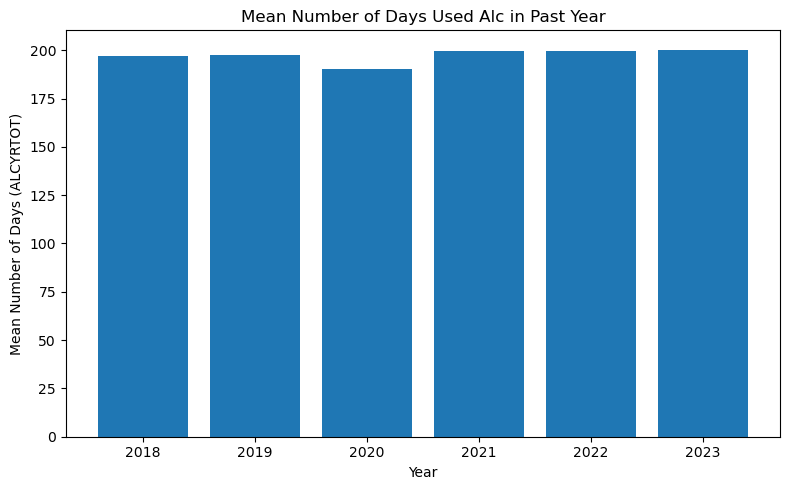

means:[np.float64(196.83431889616963), np.float64(197.29227233860624), np.float64(190.21189918827713), np.float64(199.49555433022022), np.float64(199.80023362508254), np.float64(200.26909443611675)]


In [90]:
def mean_num_drinks(df):
    df = df.loc[(df['ALCYRTOT'] >= 1) & (df['ALCYRTOT'] <= 365)]
    return np.mean(df['ALCYRTOT'])


year_num_drinks_dict = {}

for df in df_list:
    year = int(df['YEAR'].mode().iloc[0])
    drks = mean_num_drinks(df)
    year_num_drinks_dict[year] = drks

years = sorted(year_num_drinks_dict)
means = [year_num_drinks_dict[y] for y in years]

plt.figure(figsize=(8,5))
plt.bar(years, means)
plt.xlabel("Year")
plt.ylabel("Mean Number of Days (ALCYRTOT)")
plt.title("Mean Number of Days Used Alc in Past Year")
plt.xticks(years)
plt.tight_layout()
plt.show()

print(f'means:{means}')


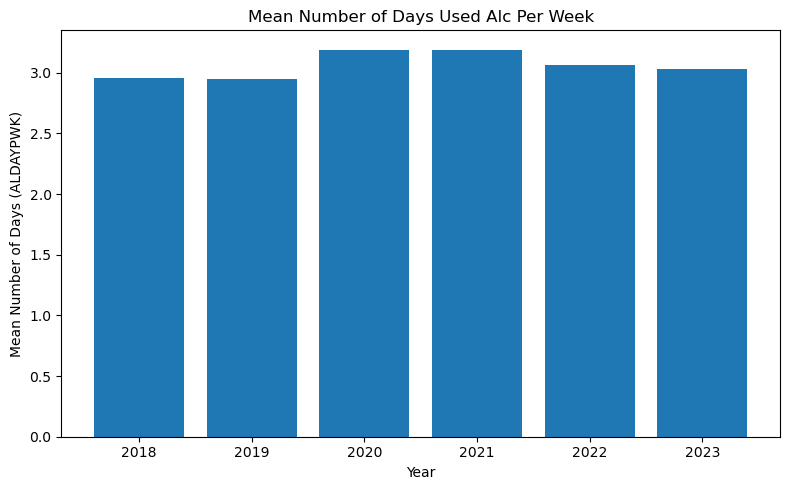

means:[np.float64(2.958293920371485), np.float64(2.949327909444641), np.float64(3.190236803810028), np.float64(3.1898269951367295), np.float64(3.061274303509806), np.float64(3.0302205281786008)]


In [80]:
def mean_wkly_drinks(df):
    df = df[(df['ALDAYPWK']>=1) & (df['ALDAYPWK']<=7)]
    return np.mean(df['ALDAYPWK'])


year_wkly_drinks_dict = {}

for df in df_list:
    year = int(df['YEAR'].mode().iloc[0])
    drks = mean_wkly_drinks(df)
    year_wkly_drinks_dict[year] = drks

years = sorted(year_wkly_drinks_dict)
means = [year_wkly_drinks_dict[y] for y in years]

plt.figure(figsize=(8,5))
plt.bar(years, means)
plt.xlabel("Year")
plt.ylabel("Mean Number of Days (ALDAYPWK)")
plt.title("Mean Number of Days Used Alc Per Week")
plt.xticks(years)
plt.tight_layout()
plt.show()

print(f'means:{means}')

In [97]:
alcyrtot_vals = pd.DataFrame(columns=['YEAR', 'ALCYRTOT'])

def gather_alcrtot_vals_by_year(dfs):
    xdfs = []
    for df in dfs:
        xdf = df[['YEAR','ALCYRTOT']]
        xdfs.append(xdf)
        alcyrtot_vals = pd.concat(xdfs, ignore_index=True)
    return alcyrtot_vals
    

long_alcyrtot_df = gather_alcrtot_vals_by_year(df_list)
long_alcyrtot_df.where(long_alcyrtot_df['ALCYRTOT']>365).count()

YEAR        0
ALCYRTOT    0
dtype: int64

Some `ALDAYPWK` vals exceeded the range (1-7) -- filtered for rows that only fit that range

Will use `long_aldaypwk_df` & `long_alcyrtot_df` for permutation and boostrap tests later

In [96]:
def gather_aldaypwk_vals_by_year(dfs):
    xdfs = []
    for df in dfs:
        xdf = df[['YEAR','ALDAYPWK']]
        xdfs.append(xdf)
        aldaypwk_vals = pd.concat(xdfs, ignore_index=True)
    return aldaypwk_vals

long_aldaypwk_df = gather_aldaypwk_vals_by_year(df_list)
long_aldaypwk_df = long_aldaypwk_df[(long_aldaypwk_df['ALDAYPWK']>=1) & 
                                    (long_aldaypwk_df['ALDAYPWK']<=7)]
long_aldaypwk_df.where(long_aldaypwk_df['ALDAYPWK']>7).count()

YEAR        0
ALDAYPWK    0
dtype: int64

In [140]:
alcyrtot_sim = long_alcyrtot_df.copy()

alcyrtot_sim_years = alcyrtot_sim['YEAR'].unique()
alcyrtot_sim_means = {year: [] for year in years}

for i in range(1000):
    alcyrtot_sim['ALCYRTOT'] = alcyrtot_sim['ALCYRTOT'].sample(frac=1, replace=False).values
    sum_alcy = alcyrtot_sim.groupby('YEAR')['ALCYRTOT'].mean()
    for idx, val in sum_alcy.items():
        alcyrtot_sim_means[idx].append(val)

In [141]:
sim_summary_alcyrtot = alcyrtot_sim.groupby('YEAR')['ALCYRTOT'].agg({'mean','count'})
print(f'Simulated mean + count `ALCYRTOT` (2018-2023)\n{sim_summary_alcyrtot}')

Simulated mean + count `ALCYRTOT` (2018-2023)
            mean  count
YEAR                   
2018  197.763039  56313
2019  197.812242  56136
2020  197.467759  32893
2021  197.681618  58034
2022  197.396028  59069
2023  198.984005  56705


In [142]:
summary_alcyrtot = long_alcyrtot_df.groupby('YEAR')['ALCYRTOT'].agg({'mean','count'})
print(f'Observered mean + count `ALCYRTOT` (2018-2023)\n{summary_alcyrtot}')

Observered mean + count `ALCYRTOT` (2018-2023)
            mean  count
YEAR                   
2018  196.834319  56313
2019  197.292272  56136
2020  190.211899  32893
2021  199.495554  58034
2022  199.800234  59069
2023  200.269094  56705


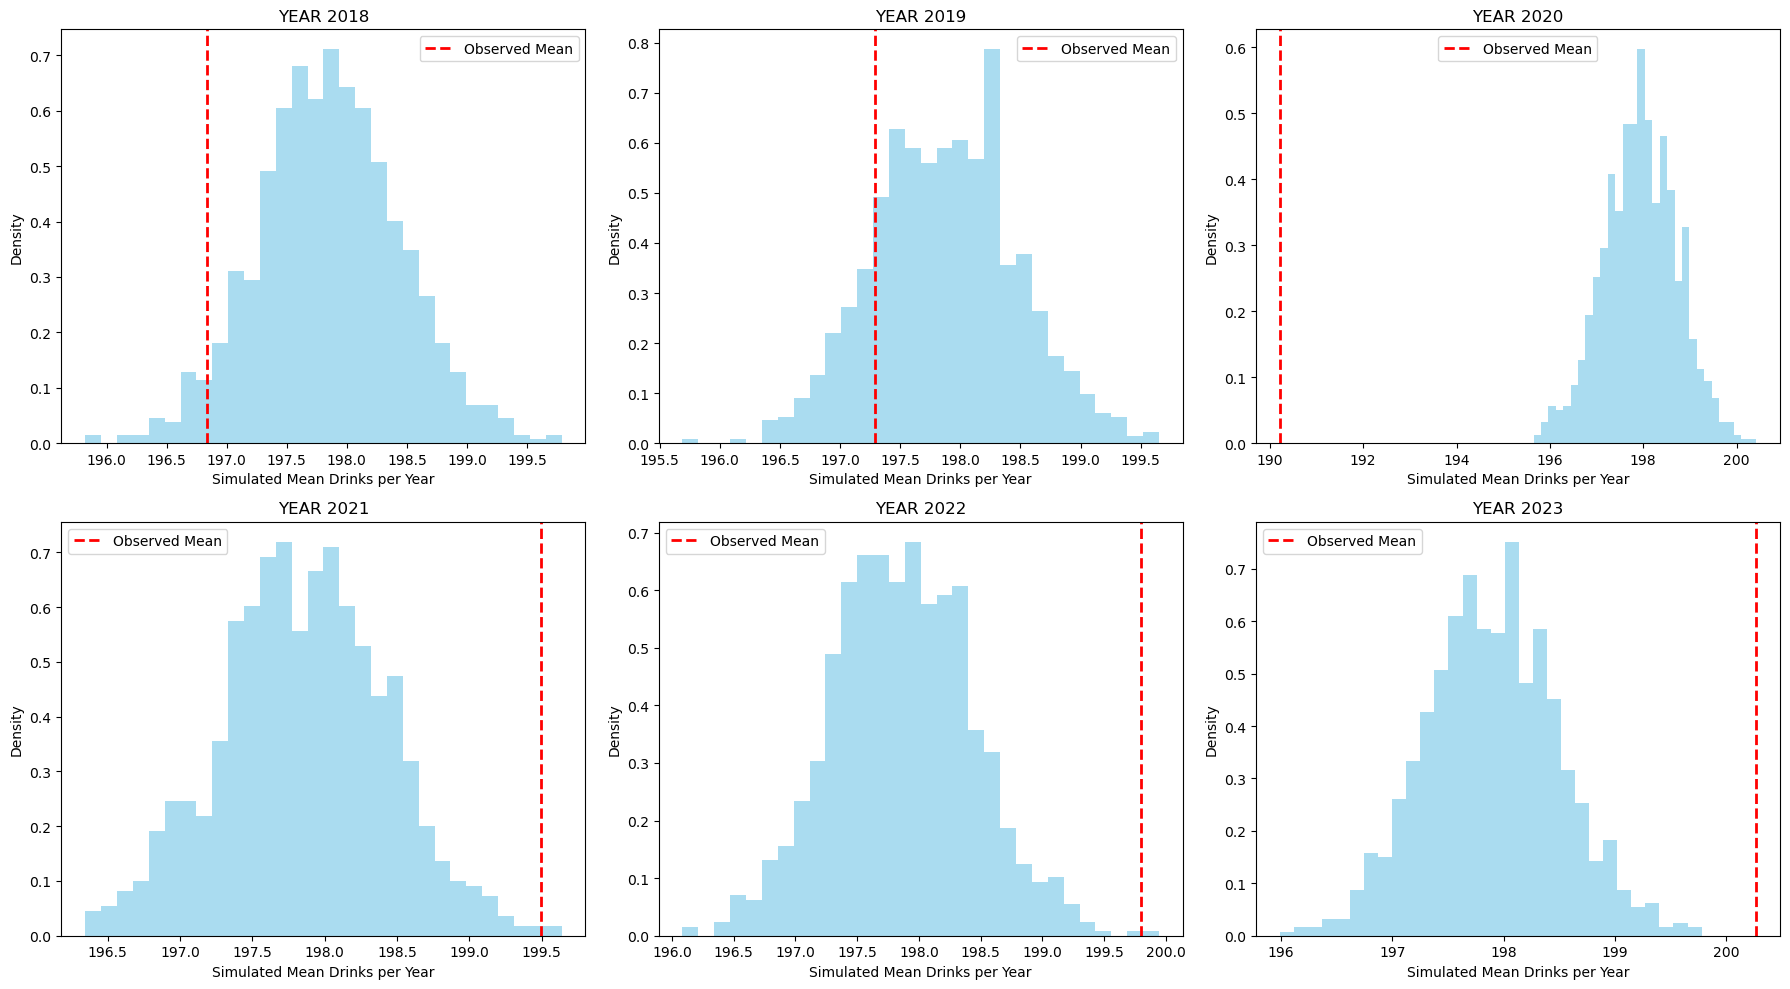

In [162]:
sim_df_new_alcyrtot = pd.DataFrame({
    'YEAR': [year for year, vals in alcyrtot_sim_means.items() for _ in vals],
    'mean': [val for vals in alcyrtot_sim_means.values() for val in vals]})

alcyrtot_observed_means = {
    2018: 196.834319,
    2019: 197.292272,
    2020: 190.211899,
    2021: 199.495554,
    2022: 199.800234,
    2023: 200.269094}

years = sorted(alcyrtot_sim_means.keys())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, year in zip(axes, years):
    # Extract simulated means for this year
    data = sim_df_new_alcyrtot.loc[sim_df_new_alcyrtot['YEAR'] == year, 'mean']
    
    # Histogram of simulation distribution
    ax.hist(data, bins=30, alpha=0.7, density=True, color='skyblue')
    
    # Observed mean line
    ax.axvline(alcyrtot_observed_means[year], color='red', linestyle='--', linewidth=2, label='Observed Mean')
    
    # Titles + labels
    ax.set_title(f"YEAR {year}")
    ax.set_xlabel("Simulated Mean Drinks per Year")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

In [164]:
alcyrtot_p_values = {}
for year in alcyrtot_sim_means.keys():
    simulated = alcyrtot_sim_means[year]
    obs = alcyrtot_observed_means[year]
    p = sum(abs(simulated - np.mean(simulated)) >= abs(obs - np.mean(simulated))) / len(simulated)
    alcyrtot_p_values[year] = p

alcyrtot_p_values_df = pd.DataFrame({
    'YEAR': list(alcyrtot_p_values.keys()),
    'Permutation_p_value': list(alcyrtot_p_values.values()),
    'Observed_Mean': [alcyrtot_observed_means[year] for year in alcyrtot_p_values.keys()]})

alcyrtot_p_values_df = alcyrtot_p_values_df.sort_values('YEAR').reset_index(drop=True)
alcyrtot_p_values_df


,YEAR,Permutation_p_value,Observed_Mean
0,2018,0.089,196.834319
1,2019,0.326,197.292272
2,2020,0.000,190.211899
3,2021,0.003,199.495554
4,2022,0.002,199.800234
5,2023,0.000,200.269094


2020 is lacking over 20,000 rows compared to other years

Imputation might be needed - unsure as of right now

In [148]:
aldaypwk_sim = long_aldaypwk_df.copy()

aldaypwk_sim_years = aldaypwk_sim['YEAR'].unique()
aldaypwk_sim_means = {year: [] for year in years}

for i in range(1000):
    aldaypwk_sim['ALDAYPWK'] = aldaypwk_sim['ALDAYPWK'].sample(frac=1, replace=False).values
    sum_alday = aldaypwk_sim.groupby('YEAR')['ALDAYPWK'].mean()
    for idx, val in sum_alday.items():
        aldaypwk_sim_means[idx].append(val)

In [165]:
sim_summary_aldaypwk = aldaypwk_sim.groupby('YEAR')['ALDAYPWK'].agg({'mean','count'})
print(f'Simulated mean + count `ALDAYPWK` (2018-2023)\n{sim_summary_aldaypwk}')

Simulated mean + count `ALDAYPWK` (2018-2023)
          mean  count
YEAR                 
2018  3.038352  11629
2019  3.064910  11308
2020  3.064162   7559
2021  3.057403  12543
2022  3.062116  11881
2023  3.063436  11019


In [161]:
summary_aldaypwk = long_aldaypwk_df.groupby('YEAR')['ALDAYPWK'].agg({'mean','count'})
print(f'Observered mean + count `ALDAYPWK` (2018-2023)\n{summary_aldaypwk}')

Observered mean + count `ALDAYPWK` (2018-2023)
          mean  count
YEAR                 
2018  2.958294  11629
2019  2.949328  11308
2020  3.190237   7559
2021  3.189827  12543
2022  3.061274  11881
2023  3.030221  11019


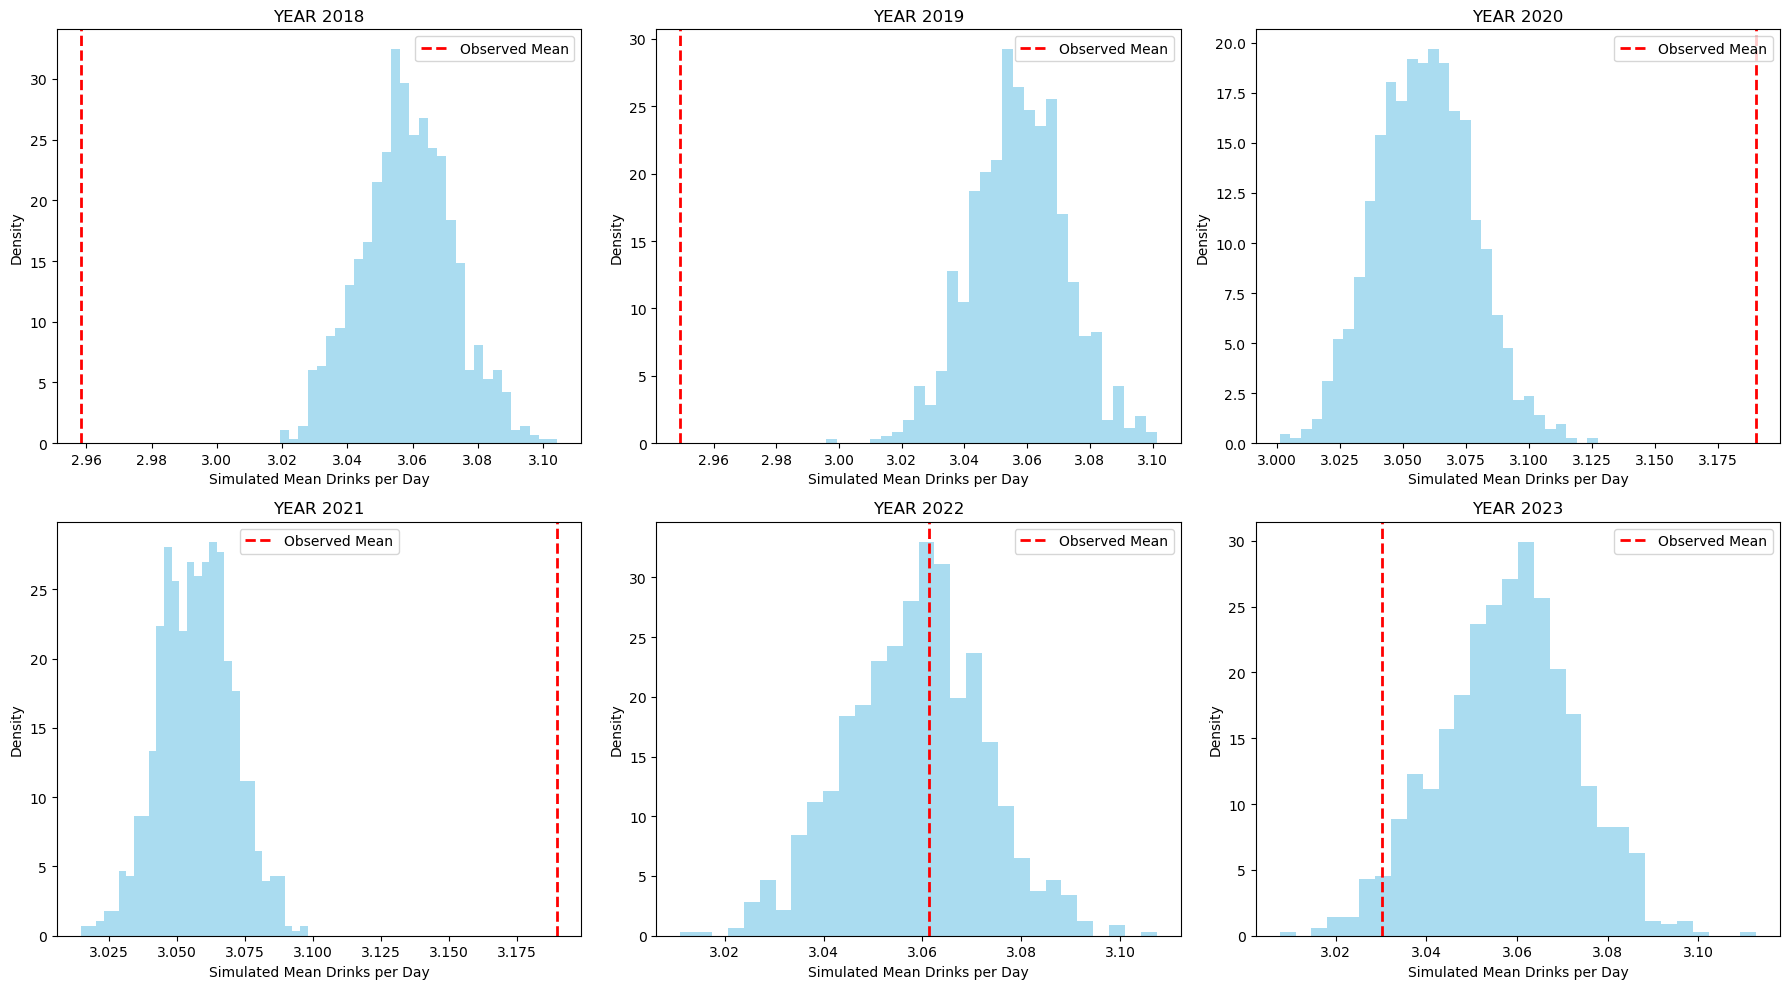

In [166]:
sim_df_new_aldaypwk = pd.DataFrame({
    'YEAR': [year for year, vals in aldaypwk_sim_means.items() for _ in vals],
    'mean': [val for vals in aldaypwk_sim_means.values() for val in vals]})

aldaypwk_observed_means = {
    2018: 2.958294,
    2019: 2.949328,
    2020: 3.190237,
    2021: 3.189827,
    2022: 3.061274,
    2023: 3.030221}

years = sorted(aldaypwk_sim_means.keys())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, year in zip(axes, years):
    # Extract simulated means for this year
    data = sim_df_new_aldaypwk.loc[sim_df_new_aldaypwk['YEAR'] == year, 'mean']
    
    # Histogram of simulation distribution
    ax.hist(data, bins=30, alpha=0.7, density=True, color='skyblue')
    
    # Observed mean line
    ax.axvline(aldaypwk_observed_means[year], color='red', linestyle='--', linewidth=2, label='Observed Mean')
    
    # Titles + labels
    ax.set_title(f"YEAR {year}")
    ax.set_xlabel("Simulated Mean Drinks per Day")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

In [167]:
aldaypwk_p_values = {}
for year in aldaypwk_sim_means.keys():
    simulated = aldaypwk_sim_means[year]
    obs = aldaypwk_observed_means[year]
    p = sum(abs(simulated - np.mean(simulated)) >= abs(obs - np.mean(simulated))) / len(simulated)
    aldaypwk_p_values[year] = p

aldaypwk_p_values_df = pd.DataFrame({
    'YEAR': list(aldaypwk_p_values.keys()),
    'Permutation_p_value': list(aldaypwk_p_values.values()),
    'Observed_Mean': [aldaypwk_observed_means[year] for year in aldaypwk_p_values.keys()]})

aldaypwk_p_values_df = aldaypwk_p_values_df.sort_values('YEAR').reset_index(drop=True)
aldaypwk_p_values_df

,YEAR,Permutation_p_value,Observed_Mean
0,2018,0.000,2.958294
1,2019,0.000,2.949328
2,2020,0.000,3.190237
3,2021,0.000,3.189827
4,2022,0.839,3.061274
5,2023,0.059,3.030221
